### Importing Libraries
Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

Numpy – Numpy arrays are very fast and can perform large computations in a very short time.

Matplotlib/Seaborn – This library is used to draw visualizations.

Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2010 to 31st December 2017 which is for 8 years for the Tesla stocks.

You can download the CSV file from:

In [2]:
df = pd.read_excel('TataMotorsHistoricalDataSet.xlsx')

In [4]:
df.head()

,Date,Price,Open,High,Low,Volume,Change(%)
0,2024-01-03,781.45,786.05,790.00,776.25,8559060,-0.0038
1,2024-01-02,784.40,800.50,804.00,779.00,13791090,-0.0078
2,2024-01-01,790.60,785.00,798.70,781.05,12570717,0.0137
3,2023-12-29,779.95,755.00,802.90,754.00,41170191,0.0346
4,2023-12-28,753.90,742.65,757.95,739.05,14906199,0.0175


In [14]:
dict = {'Closed': 'Close'}
df.rename(columns=dict,
          inplace=True)
df.head()

,Date,Close,Open,High,Low,Volume,Change(%)
0,2024-01-03,781.45,786.05,790.00,776.25,8559060,-0.0038
1,2024-01-02,784.40,800.50,804.00,779.00,13791090,-0.0078
2,2024-01-01,790.60,785.00,798.70,781.05,12570717,0.0137
3,2023-12-29,779.95,755.00,802.90,754.00,41170191,0.0346
4,2023-12-28,753.90,742.65,757.95,739.05,14906199,0.0175


In [15]:
df.shape

(4338, 7)

In [16]:
df.describe()

,Close,Open,High,Low,Volume,Change(%)
count,4338.000000,4338.000000,4338.000000,4338.000000,4.338000e+03,4338.000000
mean,288.954442,289.403628,293.570763,284.695841,1.508650e+07,0.000761
std,155.826195,156.045755,157.416225,154.393826,2.463119e+07,0.027698
min,24.970000,24.950000,26.040000,24.700000,1.235100e+04,-0.175800
25%,154.660000,155.145000,157.527500,152.155000,3.502996e+06,-0.013600
50%,268.760000,269.905000,273.435000,264.860000,7.333981e+06,0.000200
75%,419.550000,420.547500,424.987500,414.800000,1.471936e+07,0.014400
max,790.600000,800.500000,804.000000,781.050000,3.905778e+08,0.204500


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4338 entries, 0 to 4337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4338 non-null   datetime64[ns]
 1   Close      4338 non-null   float64       
 2   Open       4338 non-null   float64       
 3   High       4338 non-null   float64       
 4   Low        4338 non-null   float64       
 5   Volume     4338 non-null   int64         
 6   Change(%)  4338 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 237.4 KB


### Exploratory Data Analysis
EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

While performing the EDA of the Tesla Stock Price data we will analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

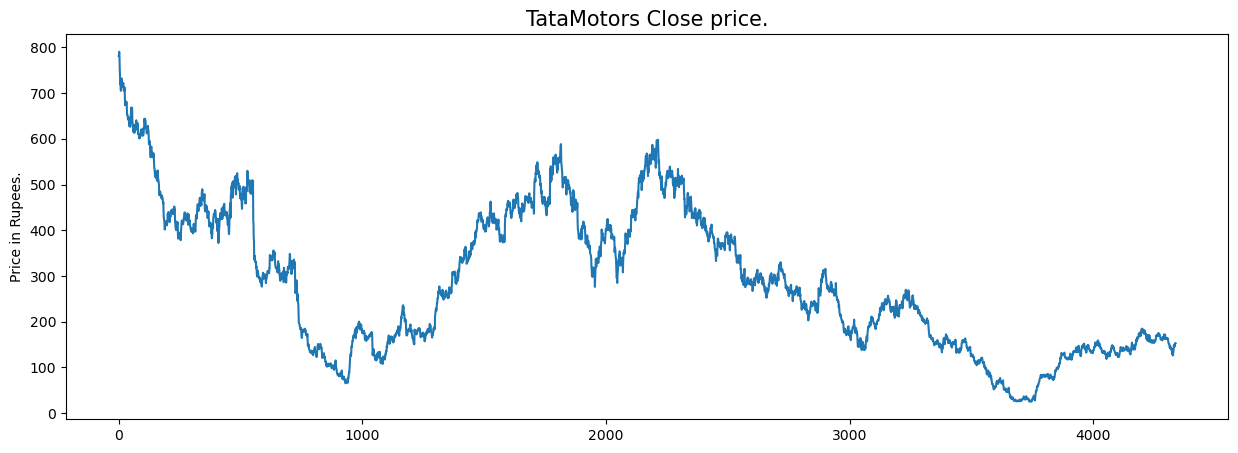

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('TataMotors Close price.', fontsize=15)
plt.ylabel('Price in Rupees.')
plt.show()